# Actividad 2 Módulo 6

#Observación: 
Se acordó con el docente que las actividades 2 sería reemplaza por la presente actividad porque en plataforma no se cuenta con información suficiente para su realización.

#Preguntas guía

- Clasificación

La clasificación es un enfoque de aprendizaje supervisado, que puede ser pensado como un medio de categorización o «clasificación» de algunos elementos desconocidos en un conjunto discreto de «clases».

La clasificación intenta aprender la relación entre un conjunto de variables características y una variable objetivo. El atributo objetivo en clasificación es una variable categórica con valores discretos.

Dado un conjunto de datos de entrenamiento, junto con las etiquetas objetivo, la clasificación determina la etiqueta de clase para un caso de prueba no etiquetado.

- Agrupación

La agrupación en clústeres es el acto de organizar objetos similares en grupos dentro de un algoritmo de aprendizaje automático. La asignación de objetos relacionados en clústeres es beneficiosa para los modelos de IA. 

La agrupación en clústeres tiene muchos usos en la ciencia de datos, como el procesamiento de imágenes, el descubrimiento de conocimiento en datos, el aprendizaje no supervisado y varias otras aplicaciones. El análisis de conglomerados, o agrupamiento, se realiza escaneando los conjuntos de datos sin etiquetar en un modelo de aprendizaje automático y configurando medidas para características de puntos de datos específicos. 

El análisis de conglomerados luego clasificará y colocará los puntos de datos en un grupo con características coincidentes. Una vez que los datos se hayan agrupado, se les asignará un número de ID de grupo para ayudar a identificar las características del grupo. Desglosar conjuntos de datos grandes e intrincados en un modelo de aprendizaje automático utilizando la técnica de agrupación puede aliviar el estrés al descifrar datos complejos.

- M étodos del codo: 

Este método utiliza los valores de la inercia obtenidos tras aplicar el K-means a diferente número de Clusters (desde 1 a N Clusters), siendo la inercia la suma de las distancias al cuadrado de cada objeto del Cluster a su centroide.

Una vez obtenidos los valores de la inercia tras aplicar el K-means de 1 a N Clusters, representamos en una gráfica lineal la inercia respecto del número de Clusters. En esta gráfica se debería de apreciar un cambio brusco en la evolución de la inercia, teniendo la línea representada una forma similar a la de un brazo y su codo. El punto en el que se observa ese cambio brusco en la inercia nos dirá el número óptimo de Clusters a seleccionar para ese data set; o dicho de otra manera, el punto que representaría al codo del brazo será el número óptimo de Clusters para ese data set.

- Gráficas 3D

Corresponde a datos que se representan en 3 ejes o axis de un plano 3d

Ejemplo K-means 3D

'''Dataset (dados aleatórios)'''

`X, y = make_blobs(n_samples=800, centers= 100, random_state=0, n_features=3)`

'''Plot datos originales'''

`fig_3d = plt.figure()`

`fig_3d.add_subplot(1,1,1, projection='3d').scatter(X[:,0], X[:,1], X[:,2])`

`plt.show()`

## Clustering with K-Means

In [54]:
from sklearn import datasets

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from matplotlib.colors import ListedColormap
from sklearn.metrics import pairwise_distances
from sklearn.metrics import silhouette_score

In [55]:
iris = datasets.load_iris()

iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

In [56]:
# variables explicativas
X = iris_df.drop(['target'], axis=1)

# Normalize the input
X = X / X.max()

#1. Realice un resumen estadístico de sus datos.

In [57]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


#2. Entregue gráficos que acompañen los hallazgos encontrados en el punto 1

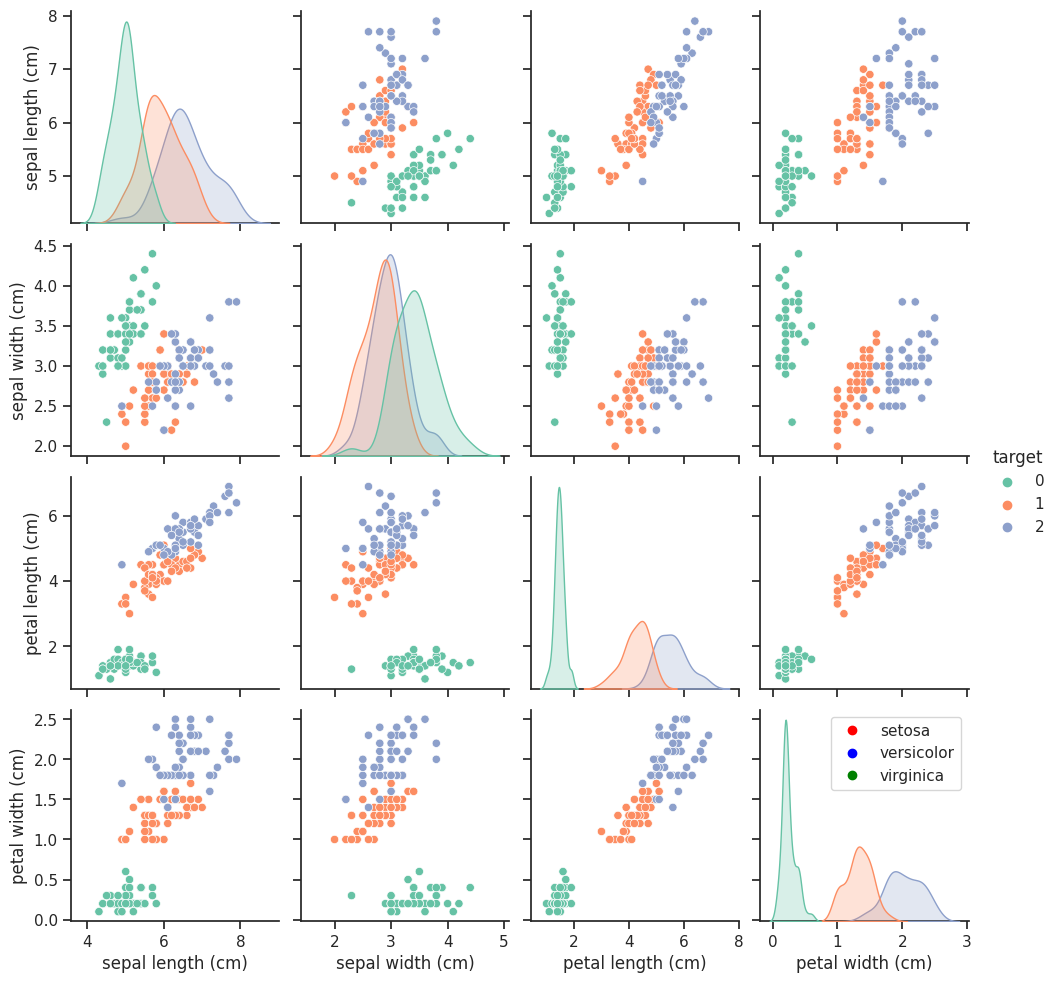

In [58]:
sns.set(style="ticks")
sns.pairplot(iris_df, hue='target', palette='Set2', diag_kind='kde', height=2.5)

cmap = ListedColormap(['red', 'blue', 'green'])
handles = [plt.Line2D([], [], marker="o", ls="", color=color) for color in cmap.colors]
plt.legend(handles, iris.target_names)

plt.show()

#3. Encuentre una relación o grafique las variables: op, ex y ag, además de las categorías.

In [59]:
# SSE scores
sse_scores = []
silhouette_scores = []

# Perform k-means clustering for k values from 2 to 8
k_values = range(2, 9)

for k in k_values:
    # Fit the k-means model
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    
    # Compute SSE (inertia)
    sse = kmeans.inertia_
    sse_scores.append(sse)

    # Calculate Silhouette score
    labels = kmeans.labels_
    silhouette = silhouette_score(X, labels)
    silhouette_scores.append(silhouette)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

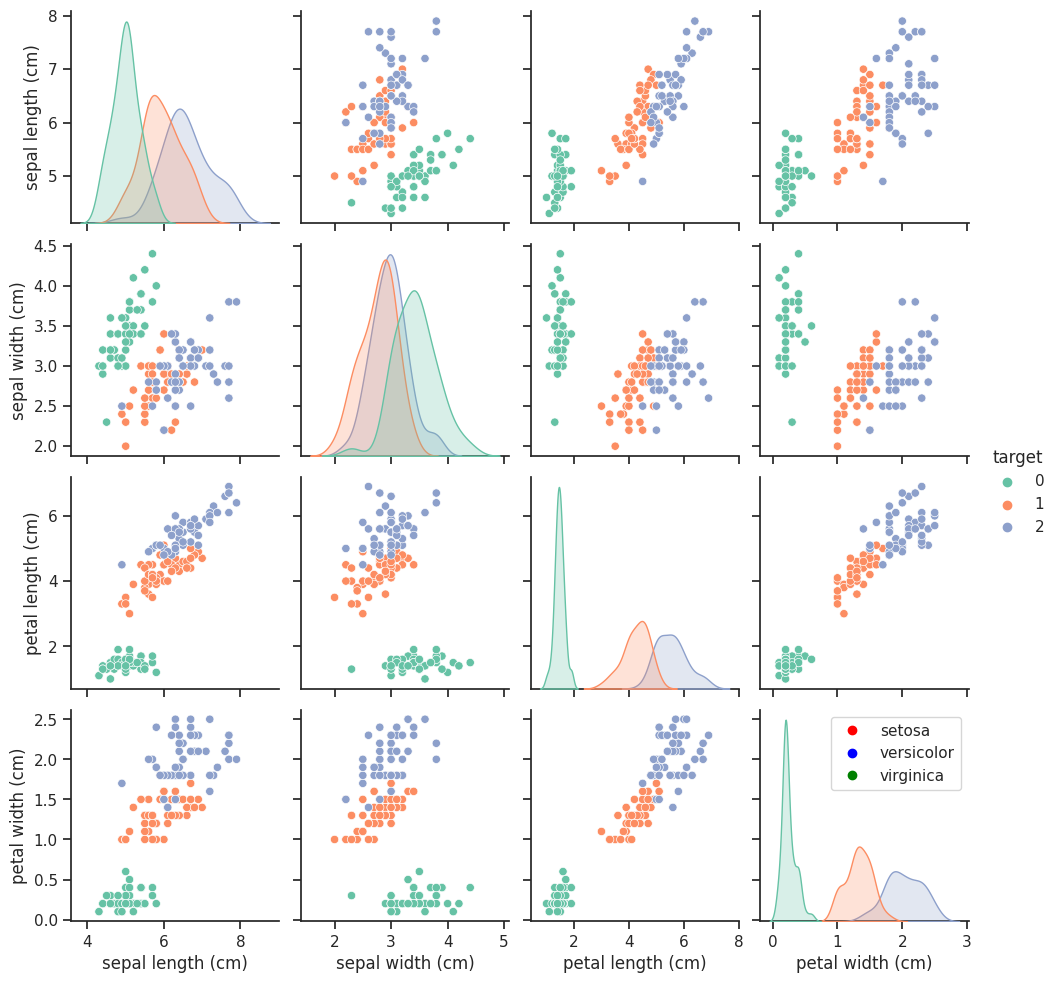

In [60]:
sns.set(style="ticks")
sns.pairplot(iris_df, hue='target', palette='Set2', diag_kind='kde', height=2.5)

cmap = ListedColormap(['red', 'blue', 'green'])
handles = [plt.Line2D([], [], marker="o", ls="", color=color) for color in cmap.colors]
plt.legend(handles, iris.target_names)

plt.show()

In [61]:
# SSE scores
sse_scores = []

# Perform k-means clustering for k values from 2 to 8
k_values = range(2, 9)

for k in k_values:

    # Fit the k-means model
    kmeans = KMeans(
        n_clusters=k,
        n_init='auto',
        random_state=42
    )

    kmeans.fit(X)
    
    # Compute SSE (inertia)
    sse = kmeans.inertia_
    sse_scores.append(sse)

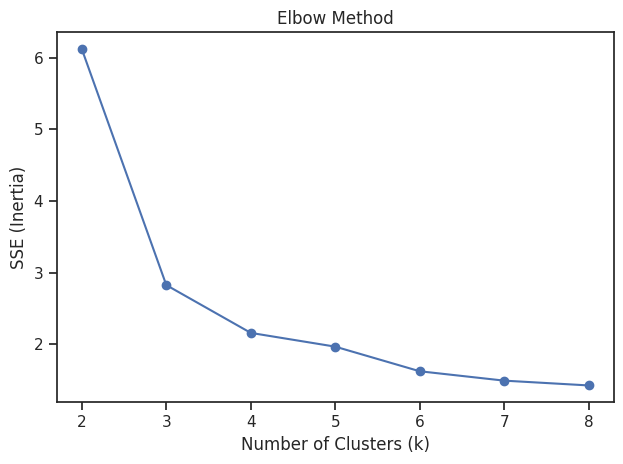

In [62]:
# Plot SSE and silhouette scores
fig, ax = plt.subplots()

# Plot SSE
ax.plot(k_values, sse_scores, marker='o')
ax.set_xlabel('Number of Clusters (k)')
ax.set_ylabel('SSE (Inertia)')
ax.set_title('Elbow Method')

plt.tight_layout()

In [63]:
# SSE scores
sse_scores = []
silhouette_scores = []

# Perform k-means clustering for k values from 2 to 8
k_values = range(2, 9)

for k in k_values:
    # Fit the k-means model
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    
    # Compute SSE (inertia)
    sse = kmeans.inertia_
    sse_scores.append(sse)

    # Calculate Silhouette score
    labels = kmeans.labels_
    silhouette = silhouette_score(X, labels)
    silhouette_scores.append(silhouette)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

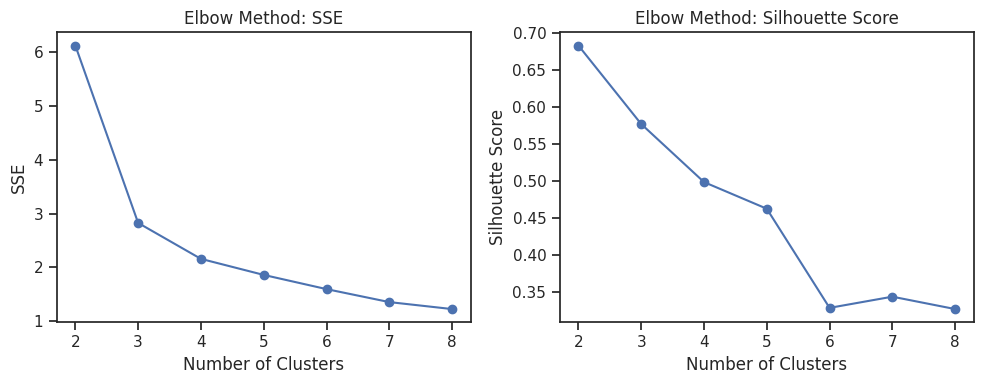

In [64]:
# Plot SSE and silhouette scores
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

ax[0].plot(k_values, sse_scores, marker='o')
ax[0].set_xlabel('Number of Clusters')
ax[0].set_ylabel('SSE')
ax[0].set_title('Elbow Method: SSE')

ax[1].plot(k_values, silhouette_scores, marker='o')
ax[1].set_xlabel('Number of Clusters')
ax[1].set_ylabel('Silhouette Score')
ax[1].set_title('Elbow Method: Silhouette Score')

plt.tight_layout()

#4. Determine cuántos k o clúster son adecuados para esta consulta.

In [65]:
# según el método del codo, existen entre 4 agrupaciones o patrones definidos.
k = 4

#5. Realice un modelo de k means con los cluster definidos en el punto 4.

In [66]:
# Fit the k-means model
kmeans = KMeans(
    n_clusters=k,
    n_init='auto',
    random_state=42
)
kmeans.fit(X)

y = kmeans.predict(X)
# agregar predicción al dataset
X['prediccion'] = y

#6. Entregue una representación gráfica de los cluster.

Text(0.5, 1.0, 'Clusters')

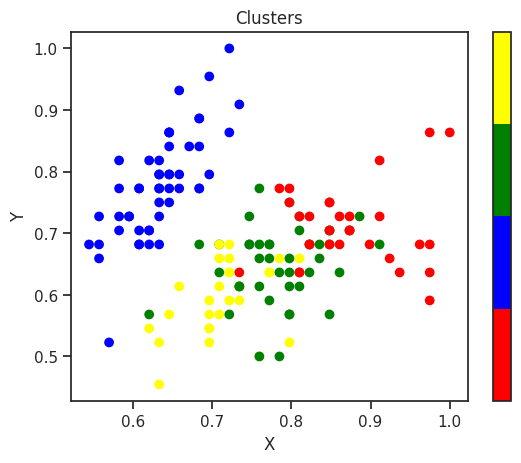

In [67]:
fig, ax = plt.subplots()

# Colores
cmap = ListedColormap(['red', 'blue', 'green', 'yellow'])

# Gráfico de dispersión 
scatter = ax.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=cmap)

# Barra de colores 
colorbar = plt.colorbar(scatter)
colorbar.set_ticks([])

# Etiquetas y el título
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Clusters')

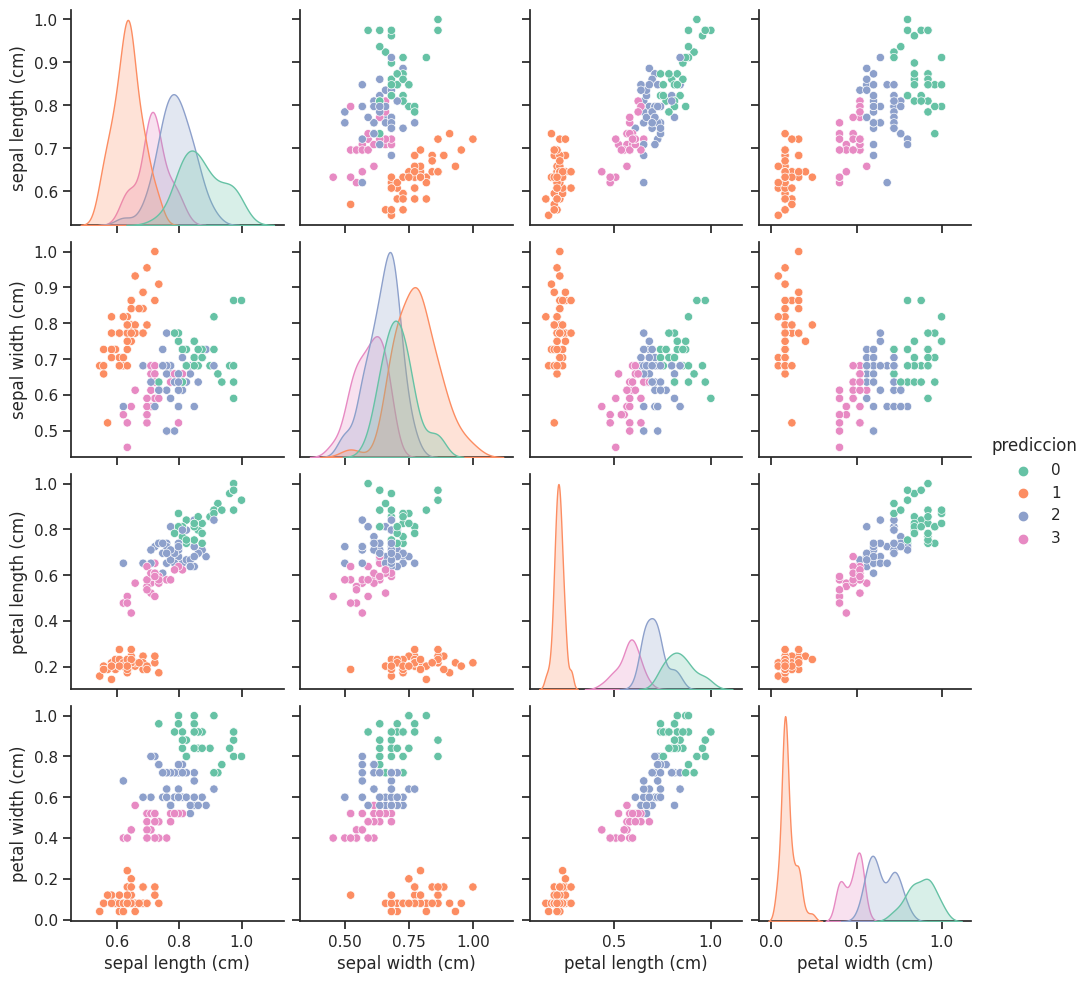

In [68]:
sns.pairplot(X, hue='prediccion', palette='Set2', diag_kind='kde', height=2.5)

#7. A qué conclusión llega y cuál es su recomendación como experto.

* Si bien este modelo no indica qué variables son las más representativas, si indica que existe un claro patrón de comportamiento (en este caso el posicionamiento de los centroides) que dió como resultado que se crearan 4 grupos en base a los datos en estudio, esto es importante y da cuenta que la información registrada contine valiosa información que puede ser útil y beneficiosa para la Empresa.
* En base a estos resultados se pueden focalizar esfuerzos en el área de marketing para crear estrategias para sus campañas focalizando sus esfuerzos en conseguir fidelizar a sus clientes y conseguir mejorar las relaciones comerciales, orientados por los comportamientos que describen los datos analizados. 

Una clara estrategia sería segmentar los clientes de acuerdo a los grupos establecidos, tomando en consideración las variables que componen cada uno de los centroides.

In [69]:
#elimina columna "prediccion"
X = X.drop(['prediccion'], axis=1)
#Obtener los máximos
cluster = ["Cluster_1", "Cluster_2", "Cluster_3", "Cluster_4"]
variables = X.columns.to_list()
df_centroides = pd.DataFrame(dict(zip(cluster, kmeans.cluster_centers_)), index=variables).abs()

max_index = df_centroides.idxmax()
max_value = df_centroides.max()

max_df = pd.DataFrame({'Variable': max_index, 'Centroide': max_value})

print("Valores Máximos Absolutos Centroides: ")
print("Para este dataset")
print(max_df)

Valores Máximos Absolutos Centroides: 
Para este dataset
                    Variable  Centroide
Cluster_1   petal width (cm)   0.877333
Cluster_2   sepal width (cm)   0.779091
Cluster_3  sepal length (cm)   0.787221
Cluster_4  sepal length (cm)   0.714738
